<a href="https://www.kaggle.com/code/andrey36912/ii-homework-mood-4-part-1?scriptVersionId=190198569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col=0)
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [4]:
y = torch.tensor(df['price'].values, dtype=torch.float32)
x = torch.tensor(df['carat'].values, dtype=torch.float32)

In [5]:
coef = torch.tensor(0.0, requires_grad=True)
intercept = torch.tensor(0.0, requires_grad=True)

In [6]:
learning_rate = 0.01

In [7]:
for t in range(2000):
    
    y_pred = coef * x + intercept
    
    
    loss = torch.mean((y_pred - y) ** 2)
    
    if t % 100 == 0:
        print(f"Epoch {t}, Loss: {loss.item()}")
 
    loss.backward()
    
    
    with torch.no_grad():
        coef -= learning_rate * coef.grad
        intercept -= learning_rate * intercept.grad
    

    coef.grad.zero_()
    intercept.grad.zero_()

print("Coef:", coef.item(), "Intercept:", intercept.item())

Epoch 0, Loss: 31382248.0
Epoch 100, Loss: 6464093.5
Epoch 200, Loss: 4804700.0
Epoch 300, Loss: 3829261.5
Epoch 400, Loss: 3249167.0
Epoch 500, Loss: 2904179.75
Epoch 600, Loss: 2699012.25
Epoch 700, Loss: 2576996.75
Epoch 800, Loss: 2504433.75
Epoch 900, Loss: 2461279.0
Epoch 1000, Loss: 2435614.5
Epoch 1100, Loss: 2420351.5
Epoch 1200, Loss: 2411274.25
Epoch 1300, Loss: 2405876.5
Epoch 1400, Loss: 2402666.0
Epoch 1500, Loss: 2400756.75
Epoch 1600, Loss: 2399621.25
Epoch 1700, Loss: 2398945.75
Epoch 1800, Loss: 2398544.5
Epoch 1900, Loss: 2398305.75
Coef: 7726.88427734375 Intercept: -2229.27392578125


In [8]:
model = LinearRegression()
X_train = df[['carat']]
y_train = df['price']
model.fit(X_train, y_train)

print("Sklearn Coef:", model.coef_[0], "Sklearn Intercept:", model.intercept_)

Sklearn Coef: 7756.425617968435 Sklearn Intercept: -2256.360580045403


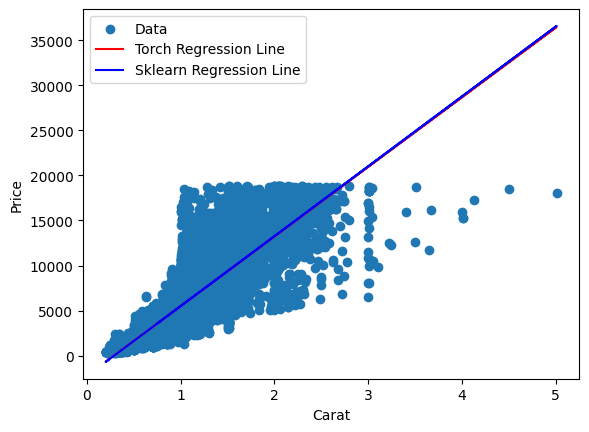

In [9]:
plt.scatter(x.numpy(), y.numpy(), label='Data')
plt.plot(x.numpy(), (coef.item() * x + intercept.item()).detach().numpy(), color='red', label='Torch Regression Line')
plt.plot(x.numpy(), (model.coef_[0] * x + model.intercept_).numpy(), color='blue', label='Sklearn Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()